In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset into the tool.

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Age', ylabel='Count'>

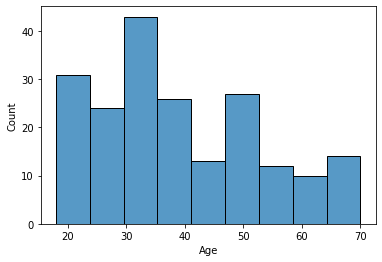

In [6]:
sns.histplot(df['Age'])

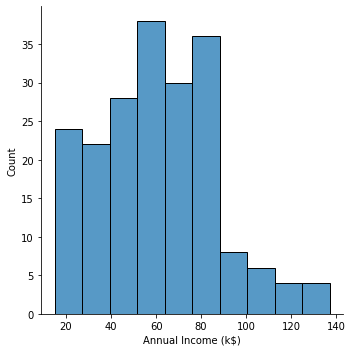

In [7]:
sns.displot(df['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

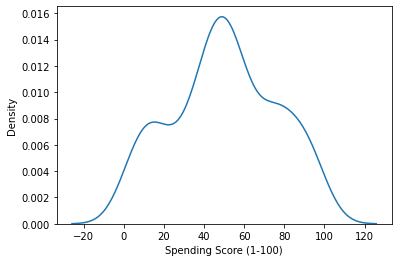

In [8]:
sns.kdeplot(df['Spending Score (1-100)'])

### BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

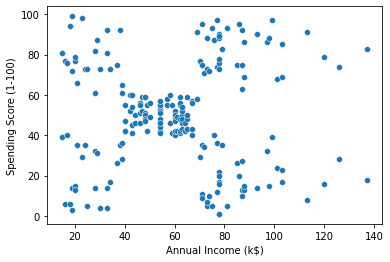

In [9]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],data=df)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>

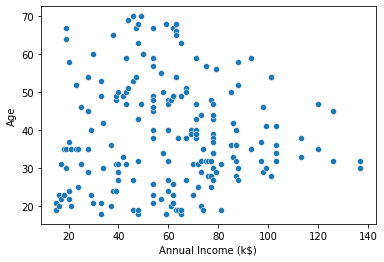

In [10]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Age'],data=df)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Age'>

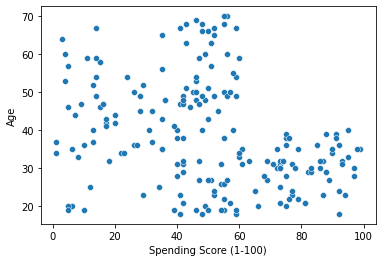

In [11]:
sns.scatterplot(x=df['Spending Score (1-100)'],y=df['Age'],data=df)

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

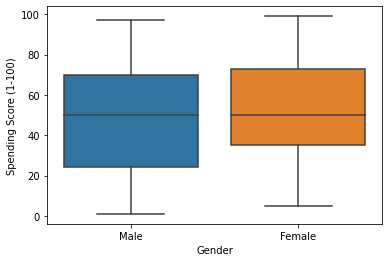

In [12]:
sns.boxplot(y=df['Spending Score (1-100)'],data=df,x=df['Gender'])

### MULTIVARIATE ANALYSIS

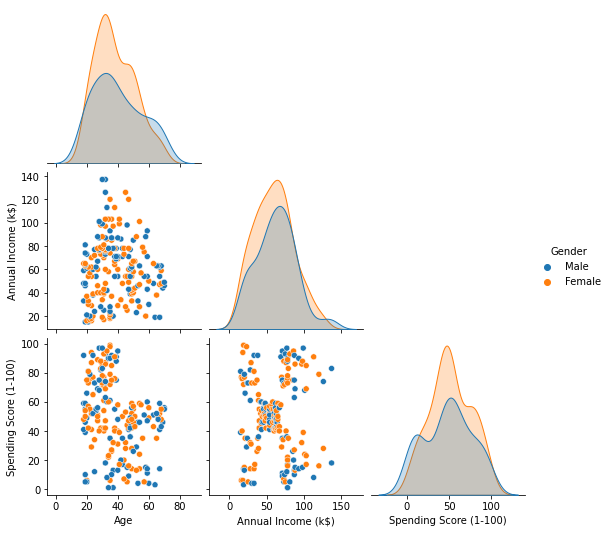

In [13]:
sns.pairplot(df.drop('CustomerID',axis=1),diag_kind='kde',corner=True,hue='Gender')

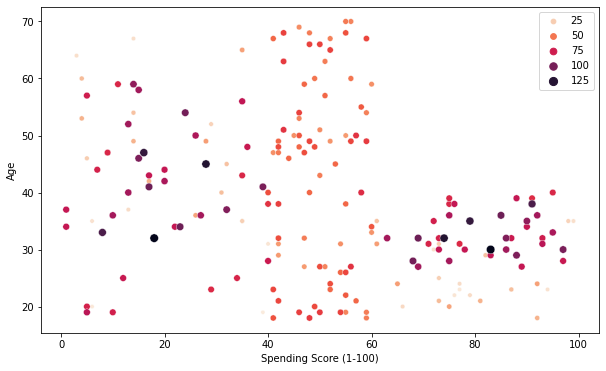

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Spending Score (1-100)'],y=df['Age'],data=df,hue=df['Annual Income (k$)'],palette='rocket_r',size=df['Annual Income (k$)'])
plt.legend(bbox_to_anchor=(1,1))

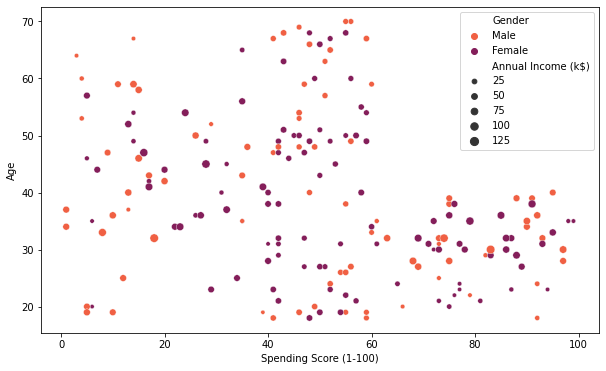

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Spending Score (1-100)'],y=df['Age'],data=df,hue=df['Gender'],palette='rocket_r',size=df['Annual Income (k$)'])
plt.legend(bbox_to_anchor=(1,1))

<AxesSubplot:>

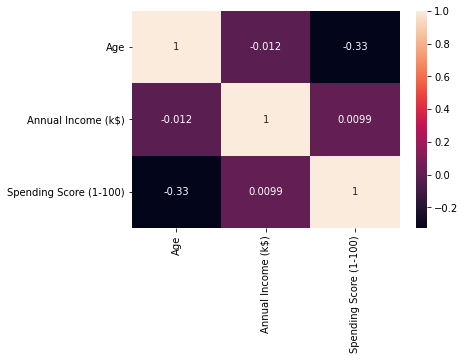

In [16]:
sns.heatmap(df.drop('CustomerID',axis=1).corr(),annot=True)

### DISCRIPTIVE STATISTICS

In [17]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
df.iloc[df['Spending Score (1-100)'].nlargest(20).index]['Gender'].value_counts()

Male      11
Female     9
Name: Gender, dtype: int64

In [19]:
lessthan50=df[df['Spending Score (1-100)']<=50]

In [20]:
greaterthan50=df[df['Spending Score (1-100)']>50]

In [21]:
lessthan50['Gender'].value_counts()

Female    59
Male      44
Name: Gender, dtype: int64

In [22]:
greaterthan50['Gender'].value_counts()

Female    53
Male      44
Name: Gender, dtype: int64

In [23]:
lessthan50.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,103.000000,103.000000,103.000000,103.000000
mean,100.689320,42.854369,60.699029,29.980583
std,56.972134,13.698725,25.923657,15.688750
min,1.000000,18.000000,15.000000,1.000000
25%,52.500000,34.000000,41.500000,15.000000
50%,101.000000,44.000000,62.000000,35.000000
75%,148.000000,51.500000,77.500000,43.000000
max,199.000000,69.000000,137.000000,50.000000


In [24]:
greaterthan50.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,97.000000,97.000000,97.000000,97.000000
mean,100.298969,34.597938,60.412371,71.670103
std,59.122783,13.024544,26.756133,14.710910
min,2.000000,18.000000,15.000000,51.000000
25%,51.000000,26.000000,42.000000,57.000000
50%,96.000000,31.000000,60.000000,73.000000
75%,152.000000,38.000000,78.000000,85.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
print('AGE LESS THAN 50 SPENDING SCORE: ',lessthan50['Age'].mean(),'\n')
print('AGE GREATER THAN 50 SPENDING SCORE: ',greaterthan50['Age'].mean())

AGE LESS THAN 50 SPENDING SCORE:  42.85436893203884 

AGE GREATER THAN 50 SPENDING SCORE:  34.597938144329895


#### CLEAR THAT YOUNG PEOPLE TEND TO SPEND MORE

### Check for Missing values and deal with them

In [26]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Find the outliers and replace them outliers

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

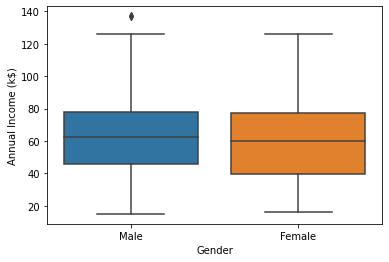

In [27]:
sns.boxplot(y=df['Annual Income (k$)'],x=df['Gender'],data=df)

#### Only outlier present removing it doesnt affect the model

### Check for Categorical columns and perform encoding

In [28]:
df=pd.get_dummies(df,drop_first=True)

#### DROP CustomerID Column 

In [29]:
df=df.drop('CustomerID',axis=1)

### Scaling the data

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()

In [32]:
X=scaler.fit_transform(df)

### Perform any of the clustering algorithms

In [80]:
from sklearn.cluster import KMeans

In [81]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

In [82]:
ssd

[212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75412.59682443162,
 58348.64136331504,
 51179.49834250716,
 44357.32664902663,
 41235.707131757124]

Text(0, 0.5, ' Sum of Squared Distances')

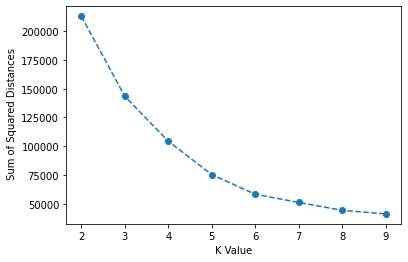

In [83]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

<AxesSubplot:>

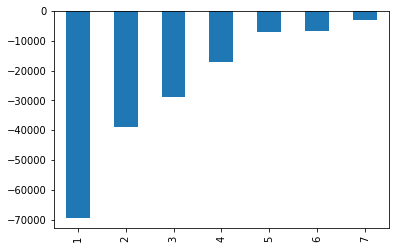

In [84]:
pd.Series(ssd).diff()[1:].plot(kind='bar')

### From This plot it is clear to choose 2 clusters.

In [59]:
kmeans=KMeans(n_clusters=2)

## Add the cluster data with the primary dataset

In [60]:
df['pred']=kmeans.fit_predict(X)

In [61]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,pred
0,19,15,39,1,1
1,21,15,81,1,1
2,20,16,6,0,0
3,23,16,77,0,1
4,31,17,40,0,1
...,...,...,...,...,...
195,35,120,79,0,1
196,45,126,28,0,0
197,32,126,74,1,1
198,32,137,18,1,0


In [62]:
df.corr()['pred']

Age                      -0.730519
Annual Income (k$)        0.002551
Spending Score (1-100)    0.720697
Gender_Male              -0.054014
pred                      1.000000
Name: pred, dtype: float64

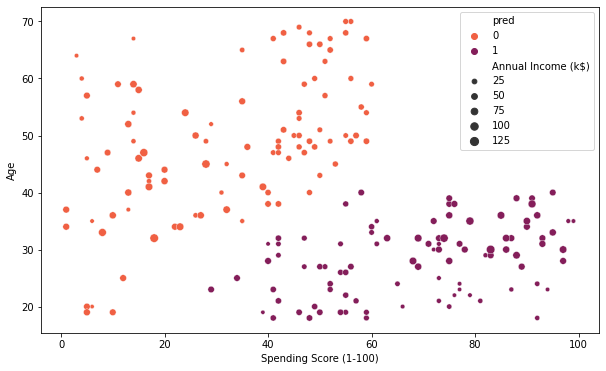

In [63]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Spending Score (1-100)'],y=df['Age'],data=df,hue=df['pred'],palette='rocket_r',size=df['Annual Income (k$)'])
plt.legend(bbox_to_anchor=(1,1))

### It is clustered on age and spending score basis

### Split the data into dependent and independent variables.

In [66]:
X=df.drop('pred',axis=1)
y=df['pred']

In [64]:
from sklearn.model_selection import train_test_split

In [67]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Build the Model

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc=RandomForestClassifier()

## Train the Model

In [70]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

## Test the Model

In [71]:
preds=rfc.predict(X_test)

## Measure the performance using Evaluation Metrics.

In [72]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [74]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.89      0.94        18

    accuracy                           0.95        40
   macro avg       0.96      0.94      0.95        40
weighted avg       0.95      0.95      0.95        40



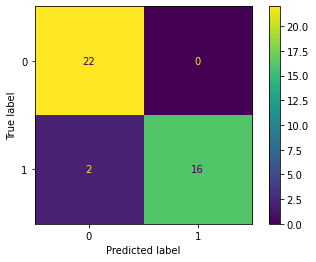

In [75]:
plot_confusion_matrix(rfc,X_test,y_test)